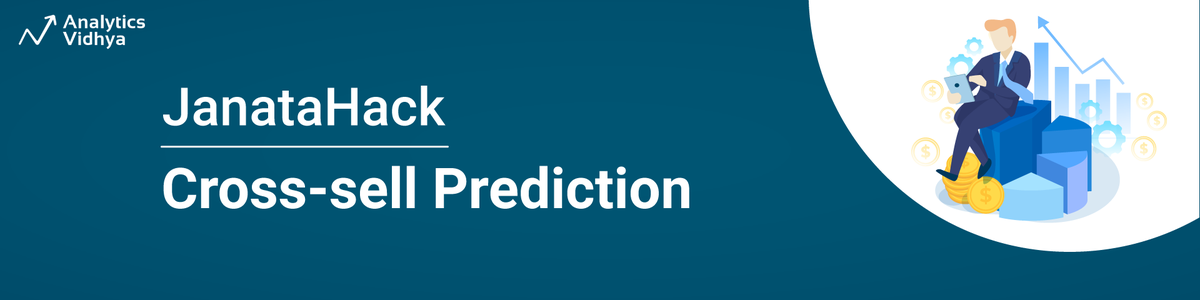

# <span style = "color:blue">Problem statement </span>

*  **Public LB rank__  : 38**
*  **Private LB rank_ : 10**
* Link to Leaderboard : 
https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/#LeaderBoard

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 
Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

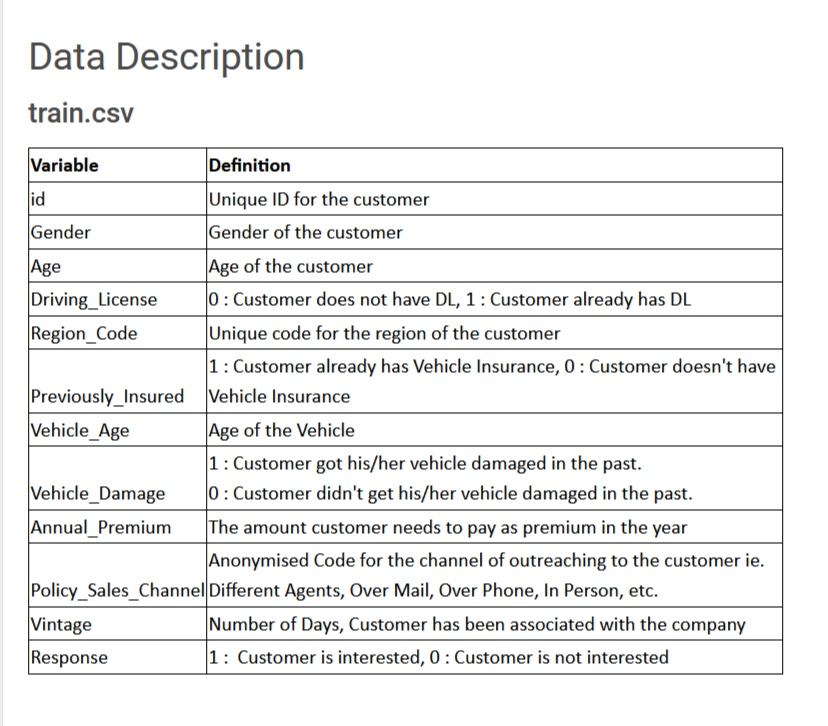

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <span style = "color:blue">Data set</span>

In [ ]:
train = pd.read_csv("../input/health-insurance-cross-sell-prediction/train.csv")
test = pd.read_csv("../input/health-insurance-cross-sell-prediction/test.csv")

print("Shape of train dataset ",train.shape )
print("Shape of test dataset ",test.shape )


In [ ]:
train.head(3).append(train.tail(3))

# <span style = "color:blue">Basic EDA</span>

In [ ]:
train.info()

*  There is no missing value in the data
*  By looking at the info of the dataset we can get a rough idea on the numeric and the string columns

In [ ]:
col = train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

* By looking at the summary of the data we can infer the mean,standard deviation, min and max of the 
* We will be able to get a idea on the outliers here by the percentiles ( In the Annual_Premium the 99th percentile is 72963 and the 
  max is 540165 this represents the outliers in this column)

## <span style = "color:blue">Response (Target variable)</span>

In [ ]:

plt.subplot(1, 2, 1)
sns.countplot(train['Response'], palette="cool")
plt.title("Count of response (target variable)")

plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")

print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)



1. By the plot we can say that this is the problem of imbalance binary classification problem
2. The indivisuals interested is 87 % as compared to the othe one.

## <span style = "color:blue">Gender variable</span>

In [ ]:

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Response'],palette="rocket_r")
plt.title("Response in Male and female category")
plt.show()


1. The gender variable in the dataset is almost equally distributed
2. Male category is slightly greater than that of female and chances of buying the insurance is also little high. 

## <span style = "color:blue"> Age variable </span>

In [ ]:
plt.figure(figsize = (15,3))
sns.countplot(train['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

In [ ]:

f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(train['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(train['Age'],ax = axx[1],color='Orange')

1. Count of the indivisuals with age 24 are greater in the dataset
2. Variable Age looks like right skewed
3. From the boxplot we observe that here is not serious outliers in the data 

## <span style = "color:blue"> Driving License  </span> 

In [ ]:
print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(train['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot('Driving_License', hue = 'Response',ax =axx[1],data = train,palette="rocket_r")


1. Customers who have the DL are 99% 
2. Customers who are interested in Vehicle Insurance almost all have driving license

##  <span style = "color:blue"> Region Code  </span> 

In [ ]:

plt.figure(figsize = (30,10))
plt.subplot(3,1,1)
sns.countplot(train['Region_Code'], palette = 'hsv')
plt.title('Count of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()


* The indivisuals with region code 28 the highest as compared to the other ones
* From the box plot it looks like there is no outliers in the data 
- Further  we can analyze which region has highest intrested customers 

##  <span style = "color:blue">Previously Insured   </span> 

In [ ]:
print("Percentage ofPreviously_Insured feature\n ")
print(train['Previously_Insured'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(train['Previously_Insured'],ax = axx[0])
sns.countplot('Previously_Insured', hue = 'Response',ax =axx[1],data = train,palette="cool_r")


1. The variable perviosly insured almost has equal count 
2. Customer who are not perviosly insured are likely to be inetrested


##  <span style = "color:blue">Vehicle Age  </span> 

In [ ]:
print("Percentage of vechicle age feature\n ")
print(train['Vehicle_Age'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("Count plot of vechicle age")
plt.subplot(1,2,2)
plt.title("Plot of vechicle age vs response")
sns.countplot('Vehicle_Age', hue = 'Response',data = train,palette="cool")


* There is very less number of customers with vechicle age less than 2 years
* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

## <span style = "color:blue">Vechicle damage   </span> 


In [ ]:
print("Percentage of vechicle damage feature\n ")
print(train['Vehicle_Damage'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'],palette="rocket_r")
plt.title("Count plot of Vehicle_Damage")
plt.subplot(1,2,2)
plt.title("Plot of vechicle damage vs response")
sns.countplot('Vehicle_Damage', hue = 'Response',data = train,palette="cool")

* Customers with vechicle damage(Yes and NO) are equally distributed with (50.48 % , 49.51 %) 
* Customers with vechicle damage are more interested in Vehicle Insurance

##  <span style = "color:blue">Annual_Premium</span> 

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(train['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
#print("-------------------------------------")
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

* From the distribution plot we can infer that the annual premimum variable is right skewed
* From the boxplot we can observe lot of outliers in the variable 

##  <span style = "color:blue">Policy_Sales_Channel</span> 

In [ ]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(train['Policy_Sales_Channel'])

plt.subplot(1,3,2)
plt.title("Boxplot of Policy_Sales_Channel")
sns.boxplot(train['Policy_Sales_Channel'],color='Orange')


##  <span style = "color:blue">Vintage</span> 

In [ ]:

f,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))
axx = ax.flatten()
sns.distplot(train['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(train['Vintage'],ax=axx[1],color='green')


In [ ]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train[col].corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

* From the correlation plot we observe that policy sales channel has slightly greater correlation with Age variable, this may be the   indication of multicollinearity. We can futher use VIF to check this

 ## <span style = "color:blue">Label Encoding </span> 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['is_train'] = 1               
test['is_train'] = 0
test['Response'] = None
df = pd.concat((train,test))       # Combining train and test together for preprocessing 
df.tail(2)

In [ ]:
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

In [ ]:
df['Region_Code']=df['Region_Code'].astype(int)              # converting the float variables to int because cat boost dosen't take float for categorical variables 
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)

In [ ]:
train = df[df['is_train']==1]                             
test = df[df['is_train']==0]
train = train.drop(['is_train'],axis=1)              
test = test.drop(['is_train','Response'] ,axis=1)

train['Response'] = train['Response'].astype(int)  # Converting object to int
train.shape , test.shape

In [ ]:
col_1 = train.columns.tolist()
col_1.remove('id')
col_1.remove('Response')
cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

##  <span style = "color:blue">Splitting data for training and validation</span> 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 

X=train[col_1]
y=train['Response']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42,stratify=y,shuffle=True)

* Test size here was randomly selected  by trail and error method 
* Since this is the case of imbalance problem we need to set stratify for the target variable this divides the data into different     stratum and then the shuffle variable randomly shuffles the data 


##  <span style = "color:blue">Cat Boost Model</span>

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=1, iterations= 500, depth= 9, border_count= 20,eval_metric = 'AUC')

cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=70,verbose=50)

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))

* The evaluation metric specified for this hackathon is AUC ROC 
* It is expected to submit the probabilities of the interested customers(Response - 1)

##  <span style = "color:blue">Light GBM model</span>

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)

lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=50,categorical_feature=cat_col,early_stopping_rounds= 50)


pred_proba = lgb.predict_proba(X_test)[:, 1]
print('Lightgbm ROC AUC SCORE: {}'.format(roc_auc_score(y_test, pred_proba)))


##  <span style = "color:blue">Cross validation using StratifiedKFold</span>

In [ ]:
from sklearn.model_selection import StratifiedKFold



lgb = LGBMClassifier(n_estimators=500,depth=5,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=42,n_jobs=-1)              # The parameter here are selected by manual tuning 
 

fold = StratifiedKFold(n_splits = 5, shuffle =True)
pred = []
score =[]
for train_index , test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
   
    lgb= lgb.fit(X_train, y_train,eval_metric='auc',eval_set=(X_test , y_test),verbose=100,categorical_feature=cat_col,early_stopping_rounds= 50)
    pred_proba = lgb.predict_proba(X_test)[:, 1]
    score.append(roc_auc_score(y_test, pred_proba))

In [ ]:
print("Mean AUC ",np.array(score).mean())
print("Max AUC ", np.array(score).max())


Training the model on whole data 

In [ ]:
lgb= lgb.fit(X, y,eval_metric='auc',verbose=2,categorical_feature=cat_col)

#  Tuning

In [ ]:


param = { 'depth':[3,1,2,6,4,8,9,10,20,30,50],
         'iterations':[250,100,500,1000],
         'learning_rate':[0.03,0.001,0.01,0.1,0.13,0.2,0.3],
         'l2_leaf_reg':[3,1,5,10,100],
         'border_count':[32,5,10,20,100,200]
        }


In [ ]:
"""
from sklearn.model_selection import RandomizedSearchCV

randm = RandomizedSearchCV(cat, param_distributions = param, cv=5,refit = True,n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
 """
print("The best parameters across ALL searched params:{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 9, 'border_count': 20}")

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgb, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

By using the permutation importance we can get an idea of the important features (features at the top)
* Permutation importance differ from model to model 
* Trained the model by removing the least importance features, scaling the variables,treating the outliers but model performance did not increase 

## <span style = "color:blue">Blending</span>

In [ ]:
pred_cat = cat.predict_proba(test[col_1])[:,1]
pred_lgb = lgb.predict_proba(test[col_1])[:,1]     #extract only the probabilities of response = 1

w1 = 0.8                    # higher weights for the catboost because from different submission catboost gave better score than lgbm
w2 = 0.2                    # Tried with different weights for lgbm and catboost and found this pair of optimal values 

final = (1/2)*((w1*pred_cat) + (w2*pred_lgb))        # Blending using average performed good for my model
submit = pd.DataFrame({'id': test.id, 'Response': final})
submit.to_csv('Blend_cat_lgb3.csv', index=False)


### <span style = "color:red">If you find this notebook helpful then please provide your appreciation </span> 